<a href="https://colab.research.google.com/github/nabigwaku/Handling-Missing-Values-in-Python/blob/master/Handling_Missing_Values_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Handling missing values is a critical step in data preprocessing. The way missing values are treated can significantly impact the outcomes of data analysis and machine learning models. This notebook outlines different methods for dealing with missing data, providing guidance on when to use each approach.

**Objectives**

  1. Identify and visualize missing data.
  2. Explore different methods to handle missing values.
  3. Understand the implications of each method.
  4. Implement the methods using Python (pandas).

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Formulating Suitable a Dataset/Dataframe

In [9]:
# dictionary of lists
data = {
    'EmployeeID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack'],
    'Department': ['HR', 'IT', pd.NA, 'HR', 'IT', 'Finance', pd.NA, 'IT', 'Finance', pd.NA],
    'Age': [25, 30, 28, 35, pd.NA, 31, pd.NA, 33, 27, 32],
    'Salary': [pd.NA, 60000, 55000, pd.NA, 58000, 63000, 57000, pd.NA, pd.NA, pd.NA], # Added pd.NA to make length consistent
    'City': ['New York', 'San Francisco', 'Los Angeles', pd.NA, 'San Francisco', 'Los Angeles', 'New York', pd.NA, pd.NA, 'San Francisco'],
    'YearsOfExperience': [3, 5, 4, 6, 2, 7, pd.NA, 8, 4, 9], # Changed pd to pd.NA
    'Gender': ['Female', pd.NA, pd.NA, 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male'],
    'HasDegree': [True, False, True, True, pd.NA, True, False, True, False, True],
    'PerformanceRating': [4.5, 3.8, 4.2, 4.0, pd.NA, 4.3, 3.9, pd.NA, 3.7, 4.4]
}

# creating a dataframe from list
df = pd.DataFrame(data)
df

,EmployeeID,Name,Department,Age,Salary,City,YearsOfExperience,Gender,HasDegree,PerformanceRating
0,1,Alice,HR,25,<NA>,New York,3,Female,True,4.5
1,2,Bob,IT,30,60000,San Francisco,5,<NA>,False,3.8
2,3,Charlie,<NA>,28,55000,Los Angeles,4,<NA>,True,4.2
3,4,David,HR,35,<NA>,<NA>,6,Male,True,4.0
4,5,Eva,IT,<NA>,58000,San Francisco,2,Female,<NA>,<NA>
5,6,Frank,Finance,31,63000,Los Angeles,7,Male,True,4.3
6,7,Grace,<NA>,<NA>,57000,New York,<NA>,Female,False,3.9
7,8,Hannah,IT,33,<NA>,<NA>,8,Female,True,<NA>
8,9,Ivy,Finance,27,<NA>,<NA>,4,Female,False,3.7
9,10,Jack,<NA>,32,<NA>,San Francisco,9,Male,True,4.4


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         10 non-null     int64 
 1   Name               10 non-null     object
 2   Department         7 non-null      object
 3   Age                8 non-null      object
 4   Salary             5 non-null      object
 5   City               7 non-null      object
 6   YearsOfExperience  9 non-null      object
 7   Gender             8 non-null      object
 8   HasDegree          9 non-null      object
 9   PerformanceRating  8 non-null      object
dtypes: int64(1), object(9)
memory usage: 928.0+ bytes


# 1. Identify Missing Values

## 1.1. Detecting Missing Values:  identifying which columns and rows have missing values.




In [15]:
# checking for missing values
missing_values = df.isnull()
missing_values
# > all those where value is true have misssing values

,EmployeeID,Name,Department,Age,Salary,City,YearsOfExperience,Gender,HasDegree,PerformanceRating
0,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,False,False,True,False,False
3,False,False,False,False,True,True,False,False,False,False
4,False,False,False,True,False,False,False,False,True,True
5,False,False,False,False,False,False,False,False,False,False
6,False,False,True,True,False,False,True,False,False,False
7,False,False,False,False,True,True,False,False,False,True
8,False,False,False,False,True,True,False,False,False,False
9,False,False,True,False,True,False,False,False,False,False


In [17]:
missing_values.sum()

,0
EmployeeID,0
Name,0
Department,3
Age,2
Salary,5
City,3
YearsOfExperience,1
Gender,2
HasDegree,1
PerformanceRating,2


## 1.2. Visualizing Missing Data

<Axes: >

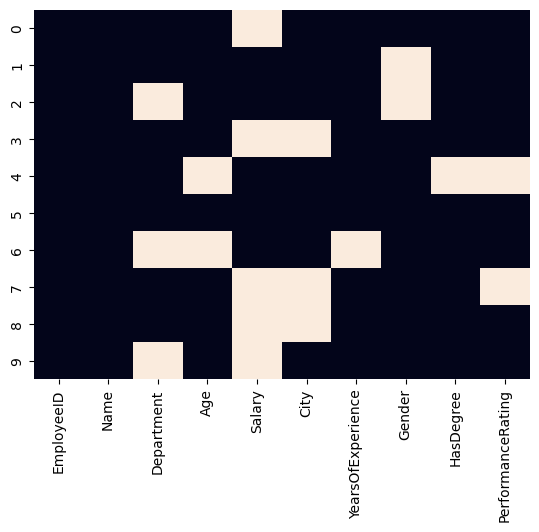

In [19]:
# Visualize missing data
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

# 2. Handling Missing Values

## 2.1. Removing Missing Data

**Overview:** Remove rows or columns with missing data. This method is appropriate when the amount of missing data is small.

**When to Use:**
1. When the dataset is large, and missing values represent a small fraction.
2. When removing missing data does not lead to significant loss of information.

In [21]:
# created a new dataframe where to store the result so that the original dataframe is not modified

# Remove rows with any missing data (when a row has atleast 1 fill missing)
data_cleaned_ver_1 = df.dropna()
data_cleaned_ver_1

,EmployeeID,Name,Department,Age,Salary,City,YearsOfExperience,Gender,HasDegree,PerformanceRating
5,6,Frank,Finance,31,63000,Los Angeles,7,Male,True,4.3


Take Away:
* All row with atleast one missing value were dropped.

In the next example we shall see how one can control the rows to drop say for a row hass all fields missing

In [40]:
# Remove rows with any missing data (when a row all fields fill missing)
data_cleaned_ver_1_1 = df.dropna(how= 'all')
data_cleaned_ver_1_1

,EmployeeID,Name,Department,Age,Salary,City,YearsOfExperience,Gender,HasDegree,PerformanceRating
0,1,Alice,HR,25,<NA>,New York,3,Female,True,4.5
1,2,Bob,IT,30,60000,San Francisco,5,<NA>,False,3.8
2,3,Charlie,<NA>,28,55000,Los Angeles,4,<NA>,True,4.2
3,4,David,HR,35,<NA>,<NA>,6,Male,True,4.0
4,5,Eva,IT,<NA>,58000,San Francisco,2,Female,<NA>,<NA>
5,6,Frank,Finance,31,63000,Los Angeles,7,Male,True,4.3
6,7,Grace,<NA>,<NA>,57000,New York,<NA>,Female,False,3.9
7,8,Hannah,IT,33,<NA>,<NA>,8,Female,True,<NA>
8,9,Ivy,Finance,27,<NA>,<NA>,4,Female,False,3.7
9,10,Jack,<NA>,32,<NA>,San Francisco,9,Male,True,4.4


In [22]:
# remove columns with any missing data (when a column has atleat 1 fill missing)
data_cleaned_ver_2 = df.dropna(axis=1)
data_cleaned_ver_2

,EmployeeID,Name
0,1,Alice
1,2,Bob
2,3,Charlie
3,4,David
4,5,Eva
5,6,Frank
6,7,Grace
7,8,Hannah
8,9,Ivy
9,10,Jack


## 2.2. Imputation: Filling Missing Data

### 2.2.1. Filling with a Constant Value

**Overview:** Replace missing values with a specific constant (e.g., 0, mean, median).

**When to Use:**
1. When missing values are assumed to be a specific known value.
2. When you want to preserve the dataset size.

In [24]:
# Fill NaNs with a constant value (e.g 0)
data_filled_ver_1 = df.fillna(value=0)
data_filled_ver_1

,EmployeeID,Name,Department,Age,Salary,City,YearsOfExperience,Gender,HasDegree,PerformanceRating
0,1,Alice,HR,25,0,New York,3,Female,True,4.5
1,2,Bob,IT,30,60000,San Francisco,5,0,False,3.8
2,3,Charlie,0,28,55000,Los Angeles,4,0,True,4.2
3,4,David,HR,35,0,0,6,Male,True,4.0
4,5,Eva,IT,0,58000,San Francisco,2,Female,0,0.0
5,6,Frank,Finance,31,63000,Los Angeles,7,Male,True,4.3
6,7,Grace,0,0,57000,New York,0,Female,False,3.9
7,8,Hannah,IT,33,0,0,8,Female,True,0.0
8,9,Ivy,Finance,27,0,0,4,Female,False,3.7
9,10,Jack,0,32,0,San Francisco,9,Male,True,4.4


Take Away::
* The data now looks strange since a city filled been filled with zero, thus fulling with zero can only work with fields of similar data types.

In the next example I shall fill with particular constants based on the column or per column

### 2.2.1.1 Filling with a Constant Value per Column

In [35]:

data_filled_ver_2 = df.fillna(value={
    'Age': 0, 'Salary': 0, 'City': 'Kampala',
    'PerformanceRating': 0.0, 'HasDegree': 'True',
    'Gender':'Female', 'YearsOfExperience': 0,
    'Department': 'Data Team'
                                     })
data_filled_ver_2

,EmployeeID,Name,Department,Age,Salary,City,YearsOfExperience,Gender,HasDegree,PerformanceRating
0,1,Alice,HR,25,0,New York,3,Female,True,4.5
1,2,Bob,IT,30,60000,San Francisco,5,Female,False,3.8
2,3,Charlie,Data Team,28,55000,Los Angeles,4,Female,True,4.2
3,4,David,HR,35,0,Kampala,6,Male,True,4.0
4,5,Eva,IT,0,58000,San Francisco,2,Female,True,0.0
5,6,Frank,Finance,31,63000,Los Angeles,7,Male,True,4.3
6,7,Grace,Data Team,0,57000,New York,0,Female,False,3.9
7,8,Hannah,IT,33,0,Kampala,8,Female,True,0.0
8,9,Ivy,Finance,27,0,Kampala,4,Female,False,3.7
9,10,Jack,Data Team,32,0,San Francisco,9,Male,True,4.4


### 2.2.2.  Filling null values with the previous ones [Forward Fill (ffill/pad)]

**Overview:** Propagate the last valid observation forward to fill gaps.

**When to Use:**
1. When data is time-series and continuity is important.
2. When the last known value is a reasonable estimate for missing data.

In [29]:
data_filled_ver_3 = df.fillna(method='ffill')
data_filled_ver_3

<ipython-input-29-81227fd6f10e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled_ver_3 = df.fillna(method='ffill')


,EmployeeID,Name,Department,Age,Salary,City,YearsOfExperience,Gender,HasDegree,PerformanceRating
0,1,Alice,HR,25,<NA>,New York,3,Female,True,4.5
1,2,Bob,IT,30,60000,San Francisco,5,Female,False,3.8
2,3,Charlie,IT,28,55000,Los Angeles,4,Female,True,4.2
3,4,David,HR,35,55000,Los Angeles,6,Male,True,4.0
4,5,Eva,IT,35,58000,San Francisco,2,Female,True,4.0
5,6,Frank,Finance,31,63000,Los Angeles,7,Male,True,4.3
6,7,Grace,Finance,31,57000,New York,7,Female,False,3.9
7,8,Hannah,IT,33,57000,New York,8,Female,True,3.9
8,9,Ivy,Finance,27,57000,New York,4,Female,False,3.7
9,10,Jack,Finance,32,57000,San Francisco,9,Male,True,4.4


Take Away:
* As stated above, it fills the NANs value with the value above it, ie brings it forward hence the forwardfill method.
  * When you take a look at the salary column, since Alice was the 1st Employee, there was no other salary to carry forward thus it stayed null

There are situations when when one shall need to fill foward column wise, In the next step we shall be filling column-wise to acheive that

In [31]:
data_filled_ver_4 = df.fillna(method='ffill', axis= 1)
data_filled_ver_4

<ipython-input-31-8a324c550703>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled_ver_4 = df.fillna(method='ffill', axis= 1)


,EmployeeID,Name,Department,Age,Salary,City,YearsOfExperience,Gender,HasDegree,PerformanceRating
0,1,Alice,HR,25,25,New York,3,Female,True,4.5
1,2,Bob,IT,30,60000,San Francisco,5,5,False,3.8
2,3,Charlie,Charlie,28,55000,Los Angeles,4,4,True,4.2
3,4,David,HR,35,35,35,6,Male,True,4.0
4,5,Eva,IT,IT,58000,San Francisco,2,Female,Female,Female
5,6,Frank,Finance,31,63000,Los Angeles,7,Male,True,4.3
6,7,Grace,Grace,Grace,57000,New York,New York,Female,False,3.9
7,8,Hannah,IT,33,33,33,8,Female,True,True
8,9,Ivy,Finance,27,27,27,4,Female,False,3.7
9,10,Jack,Jack,32,32,San Francisco,9,Male,True,4.4


Take Away:
 * Best example to observe the fill is taking a look at City and PearsOfEcperience columns, the city NewYork has been filled forward on to the next column of YearOfExperience

 * Row-Wise vs. Column-Wise:
   * Row-Wise: Ideal for time-series or sequential data.
   * Column-Wise: Ideal when columns are related and the missing data can be inferred from neighboring columns.

### 2.2.3. Filling null value with the next ones [Backward Fill (bfill/backfill)]

**Overview:** Propagate the next valid observation backward to fill gaps.

**When to Use:**
1. When data is time-series and you expect future values to be more relevant for missing data.
2. When using forward fill might introduce bias or incorrect trends.

In [33]:
# Backward fill
data_filled_ver_5 = df.fillna(method='bfill')
data_filled_ver_5


<ipython-input-33-f4e04cfcbd87>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled_ver_5 = df.fillna(method='bfill')


,EmployeeID,Name,Department,Age,Salary,City,YearsOfExperience,Gender,HasDegree,PerformanceRating
0,1,Alice,HR,25,60000,New York,3,Female,True,4.5
1,2,Bob,IT,30,60000,San Francisco,5,Male,False,3.8
2,3,Charlie,HR,28,55000,Los Angeles,4,Male,True,4.2
3,4,David,HR,35,58000,San Francisco,6,Male,True,4.0
4,5,Eva,IT,31,58000,San Francisco,2,Female,True,4.3
5,6,Frank,Finance,31,63000,Los Angeles,7,Male,True,4.3
6,7,Grace,IT,33,57000,New York,8,Female,False,3.9
7,8,Hannah,IT,33,<NA>,San Francisco,8,Female,True,3.7
8,9,Ivy,Finance,27,<NA>,San Francisco,4,Female,False,3.7
9,10,Jack,<NA>,32,<NA>,San Francisco,9,Male,True,4.4


Take Away:
 * Notice on salary, Jack, Ivy and Hannah donot have salary values. whereas Alice now has a salary value based on Bbo's. this best explainings the backward fill

We can also have a column-wise backward fill based on the data you working with and the need. see example below

In [34]:
data_filled_ver_6 = df.fillna(method='bfill', axis=1)
data_filled_ver_6

<ipython-input-34-24dfab689b21>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled_ver_6 = df.fillna(method='bfill', axis=1)


,EmployeeID,Name,Department,Age,Salary,City,YearsOfExperience,Gender,HasDegree,PerformanceRating
0,1,Alice,HR,25,New York,New York,3,Female,True,4.5
1,2,Bob,IT,30,60000,San Francisco,5,False,False,3.8
2,3,Charlie,28,28,55000,Los Angeles,4,True,True,4.2
3,4,David,HR,35,6,6,6,Male,True,4.0
4,5,Eva,IT,58000,58000,San Francisco,2,Female,<NA>,<NA>
5,6,Frank,Finance,31,63000,Los Angeles,7,Male,True,4.3
6,7,Grace,57000,57000,57000,New York,Female,Female,False,3.9
7,8,Hannah,IT,33,8,8,8,Female,True,<NA>
8,9,Ivy,Finance,27,4,4,4,Female,False,3.7
9,10,Jack,32,32,San Francisco,San Francisco,9,Male,True,4.4


Take Away:
* In the output above, Value of female has been assigned Grace's field for YearsofExperience from her Gender field thus demostrating how a column-eise backfill works

### 2.2.4. Filling with Statistical Values

**Overview:** Fill missing values with statistical measures such as the mean, median, or mode.

**When to Use:**
1. When missing data is assumed to be randomly distributed.
2. When the dataset is large enough that the overall mean or median is a reasonable

---


1. Filling with Mean:
   * **When to Use:** Use the mean when your data is normally distributed (i.e., the data has a bell-shaped curve). The mean is a good representative value for such data, and filling with it won’t introduce much bias.

   * **Example:** If you’re working with height data and you know that heights are normally distributed, filling missing heights with the average height makes sense.

2. Filling with Median:
   * **When to Use:** Use the median when your data is skewed (i.e., not symmetrical). The median is less affected by outliers (extreme values), so it’s better for data where there are big gaps or extreme variations.

  * **Example:** If you’re working with income data, which is often skewed (a few people earn a lot, most earn less), filling missing values with the median is better than using the mean.

3. Filling with Mode:
   * **When to Use:**Use the mode when your data is categorical (e.g., colors, names) or when you expect that the most common value is a good guess for the missing values.

  * **Example:** If you have a column for "favorite color," where most people choose "blue," filling in missing values with "blue" makes sense.



In [38]:
data_filled_ver_7 = df.fillna(value= {
'Age': df['Age'].mean(),
    'Salary': df['Salary'].mean(),
    'City': 'Kampala',
    'PerformanceRating': df['PerformanceRating'].median(),
    'HasDegree': df['HasDegree'].mode()[0],
    'Gender': df['Gender'].mode()[0],
    'YearsOfExperience': df['YearsOfExperience'].mean()
})
data_filled_ver_7

,EmployeeID,Name,Department,Age,Salary,City,YearsOfExperience,Gender,HasDegree,PerformanceRating
0,1,Alice,HR,25.000,58600.0,New York,3.000000,Female,True,4.5
1,2,Bob,IT,30.000,60000.0,San Francisco,5.000000,Female,False,3.8
2,3,Charlie,<NA>,28.000,55000.0,Los Angeles,4.000000,Female,True,4.2
3,4,David,HR,35.000,58600.0,Kampala,6.000000,Male,True,4.0
4,5,Eva,IT,30.125,58000.0,San Francisco,2.000000,Female,True,4.1
5,6,Frank,Finance,31.000,63000.0,Los Angeles,7.000000,Male,True,4.3
6,7,Grace,<NA>,30.125,57000.0,New York,5.333333,Female,False,3.9
7,8,Hannah,IT,33.000,58600.0,Kampala,8.000000,Female,True,4.1
8,9,Ivy,Finance,27.000,58600.0,Kampala,4.000000,Female,False,3.7
9,10,Jack,<NA>,32.000,58600.0,San Francisco,9.000000,Male,True,4.4
